## Red Wine Quality Prediction

### 1. Import important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

### 2. Import data set

####  a). Data Frame

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv',sep=',')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### b). Data Frame Shape

In [3]:
df.shape

(1599, 12)

#### c). Data Frame Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##### Outome :
* 1. All column except 'quality' are type of float. 'quality' is only the type of int.
* 2. There is no null value in data set.

#### d). Cross check the null value

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### Outcome :
* There is no null value in the data set.

#### e). Describe the data

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Visualize the describe data

Text(0.5, 1.0, 'Correlation Matrix For Statical Data')

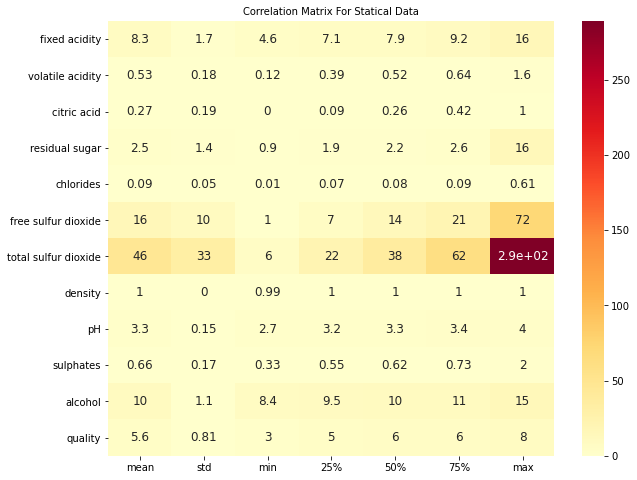

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,annot_kws={'size':12},cmap='YlOrRd')
plt.title('Correlation Matrix For Statical Data',fontsize=10)

### 3.Correlation matrix to see the coffecient of multicolinearity

#### a). Correlation matrix is in form of data frame

In [8]:
df_corr = df.corr().abs()
df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.256131,0.671703,0.114777,0.093705,0.153794,0.113181,0.668047,0.682978,0.183006,0.061668,0.124052
volatile acidity,0.256131,1.000000,0.552496,0.001918,0.061298,0.010504,0.076470,0.022026,0.234937,0.260987,0.202288,0.390558
citric acid,0.671703,0.552496,1.000000,0.143577,0.203823,0.060978,0.035533,0.364947,0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,0.265026,0.371260,0.221141,0.128907
free sulfur dioxide,0.153794,0.010504,0.060978,0.187049,0.005562,1.000000,0.667666,0.021946,0.070377,0.051658,0.069408,0.050656
total sulfur dioxide,0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,0.066495,0.042947,0.205654,0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,0.021946,0.071269,1.000000,0.341699,0.148506,0.496180,0.174919
pH,0.682978,0.234937,0.541904,0.085652,0.265026,0.070377,0.066495,0.341699,1.000000,0.196648,0.205633,0.057731
sulphates,0.183006,0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,0.196648,1.000000,0.093595,0.251397


#### b). Visualize Correlation matrix using heatmap 

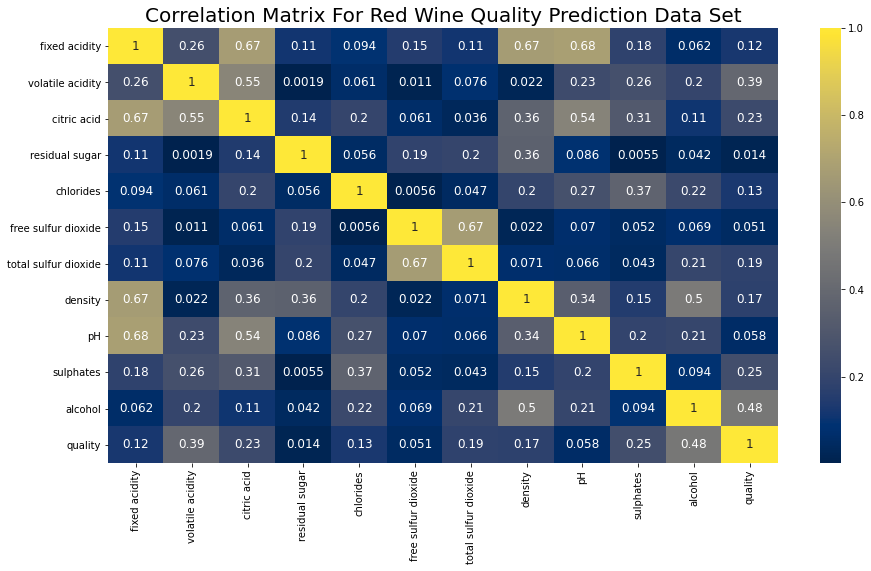

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12},cmap='cividis')
plt.title('Correlation Matrix For Red Wine Quality Prediction Data Set',fontsize=20)
plt.show()

##### Outcome :

All the columns of dataset are positively correlaated with the target column.

1. alcohol has 48 percentage correlation with target column which can be considered as strong bond.
2. volatile acidity has 39 percentage correlation with target column which can be considered as strong bond.
3. sulphates has 25 percentage correlation with target column which can be considered as good bond.
4. citric acid has 23 percentage correlation with target column which can be considered as good bond.
5. total sulfur dioxide has 19 percentage correlation with target column which can be considered as good bond.
6. density has 17 percentage correlation with target column which can be considered as good bond.
7. chlorides has 13 percentage correlation with target column which can be considered as good bond.
8. fixed acidity has 12 percentage correlation with target column which can be considered as good bond.
9. pH has 5.8 percentage correlation with target column which can be considered as weak bond.
10. free sulfur dioxide has 5.1 percentage correlation with target column which can be considered as weak bond.
11. residual sugar has 1.4 percentage correlation with target column which can be considered as weak bond.
12. pH and citric acid/ fixed acidity are highly inversely related as in generally acids have smaller pH values.

Max Correlation : alcohol

Min Correlation : residual sugar 

### 4. Visualize the distribution of data

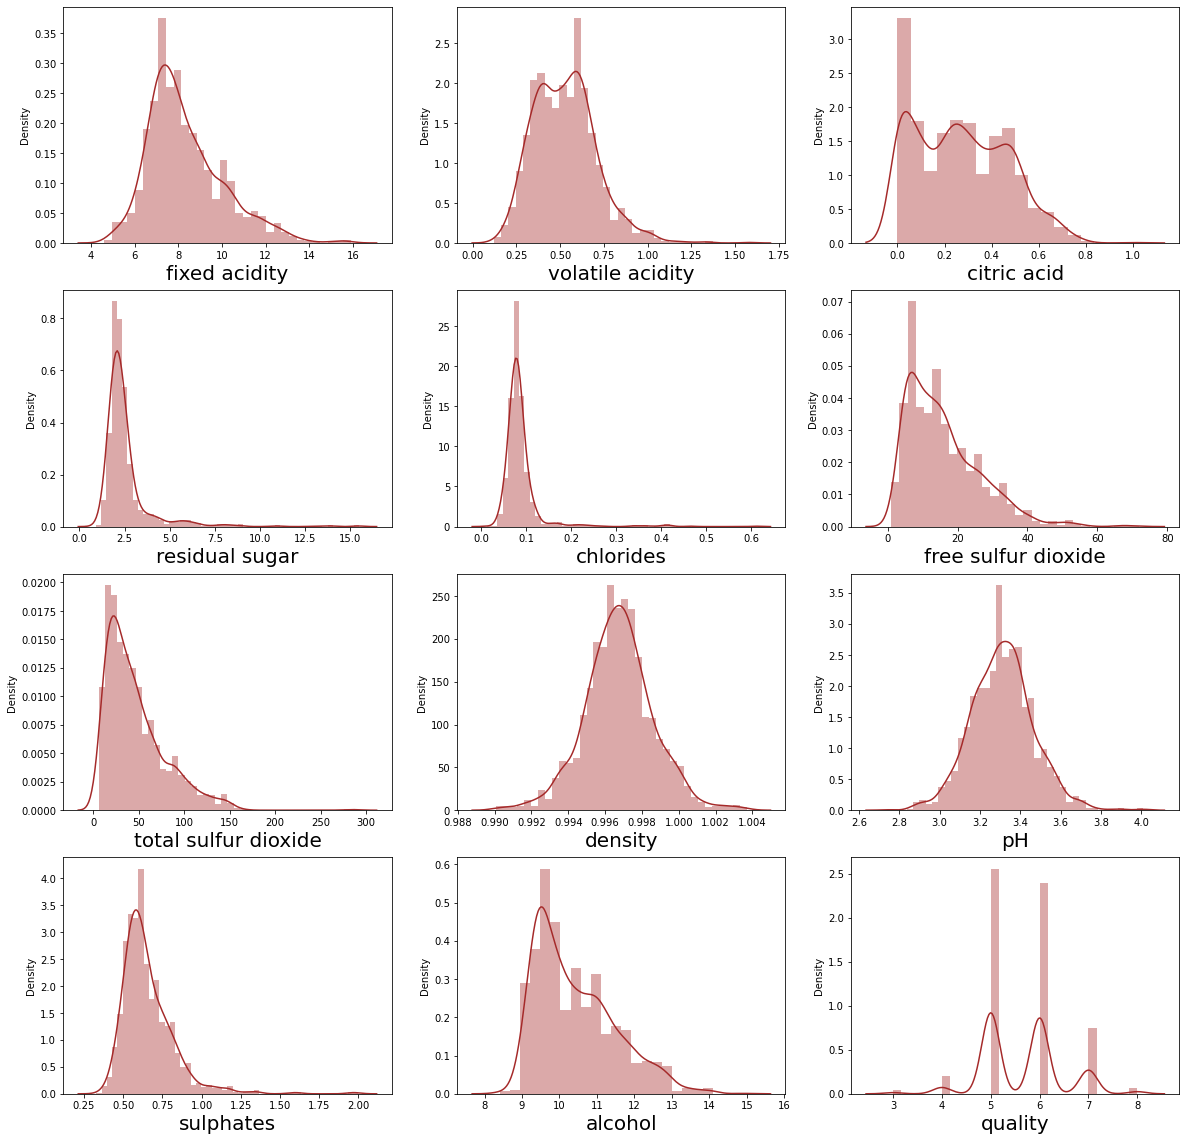

In [10]:
plt.figure(figsize=(20,20))
plot_number = 1
for col in df:
    if plot_number<=12:
        ax = plt.subplot(4,3,plot_number)   # plot is distributed in 4 row & 3 column
        sns.distplot(df[col],color='brown')           # plot displot for col which have all df column         
        plt.xlabel(col,fontsize = 20)
        
              
    plot_number+=1                           #increase plotnumber value by 1  
plt.show()

##### Outcome :
As from the above distribution i can find our data is sked. I am trying to find the skewness value.

#### a). finding the skewness value

In [11]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

#### b). finding the outlier's

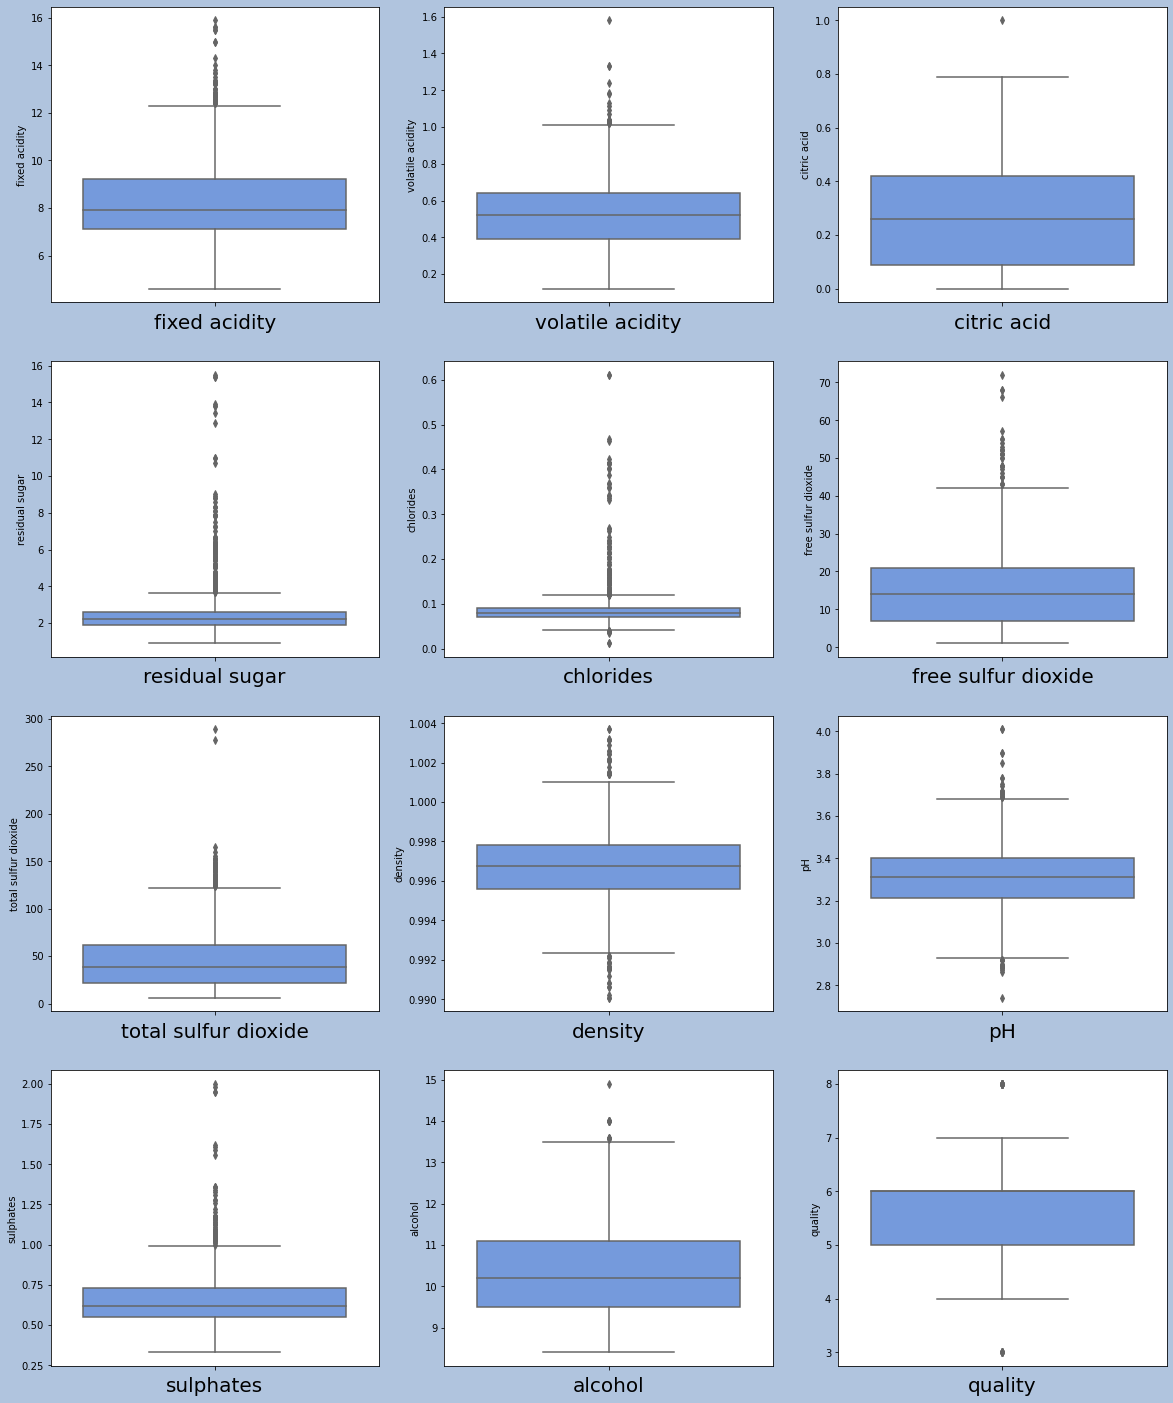

In [12]:
plt.figure(figsize=(20,25),facecolor='LightsteelBlue')
graph = 1

for col in df:
    if graph<=30:
        ax = plt.subplot(4,3,graph)
        sns.boxplot(y=df[col],color='Cornflowerblue')
        plt.xlabel(col,fontsize = 20)
        
    graph+=1
plt.show() 

##### Outcome : 
* I can see outlier's is present in the data set. i will deal it in later part.
* As per problem statement 'quality' is our target variable.

### 5. Visualize the features with respect to target variable

#### a). Visualize 'fixed acidity' with respect to 'quality'

Text(0.5, 1.0, 'fixed acidity v/s quality')

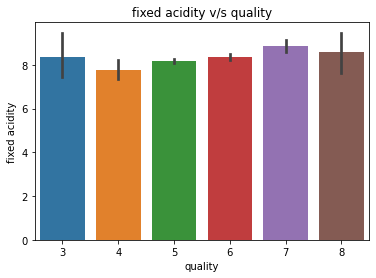

In [13]:
sns.barplot(y='fixed acidity',x='quality',data=df)
plt.title('fixed acidity v/s quality')

#### b). Visualize 'volatile acidity' with respect to 'quality'

Text(0.5, 1.0, 'volatile acidity v/s quality')

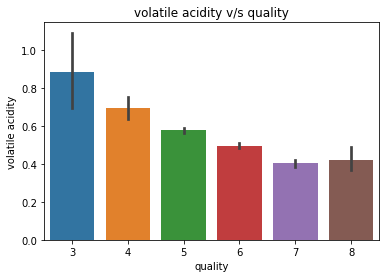

In [14]:
sns.barplot(y='volatile acidity',x='quality',data=df)
plt.title('volatile acidity v/s quality')

##### Outcome : As i observed decreasing the value have impact on 'quality'.

#### c). Visualize 'citric acid' with respect to 'quality'

Text(0.5, 1.0, 'citric acid v/s quality')

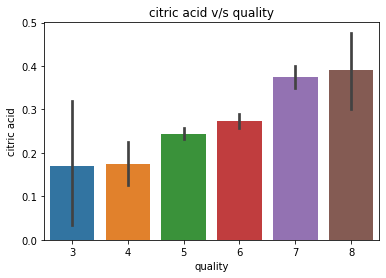

In [15]:
sns.barplot(y='citric acid',x='quality',data=df)
plt.title('citric acid v/s quality')

##### Outcome : Increasing the value have impact on 'quality'.

#### d). Visualize 'residual sugar' with respect to 'quality'

Text(0.5, 1.0, 'residual sugar v/s quality')

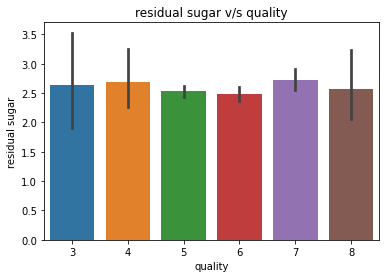

In [16]:
sns.barplot(y='residual sugar',x='quality',data=df)
plt.title('residual sugar v/s quality')

#### e). Visualize 'chlorides' with respect to 'quality'

Text(0.5, 1.0, 'chlorides v/s quality')

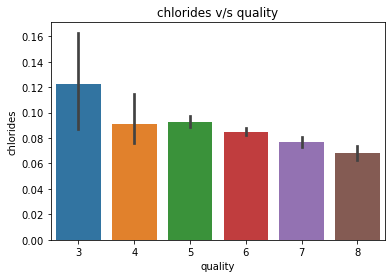

In [17]:
sns.barplot(y='chlorides',x='quality',data=df)
plt.title('chlorides v/s quality')

##### Outcome : Decreasing the value have an impact on 'quality'.

#### f). Visualize 'free sulfur dioxide' with respect to 'quality'

Text(0.5, 1.0, 'free sulfur dioxide v/s quality')

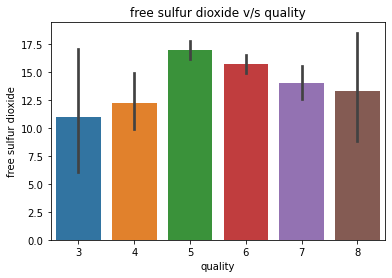

In [18]:
sns.barplot(y='free sulfur dioxide',x='quality',data=df)
plt.title('free sulfur dioxide v/s quality')

#### g). Visualize 'total sulfur dioxide' with respect to 'quality'

Text(0.5, 1.0, 'total sulfur dioxide v/s quality')

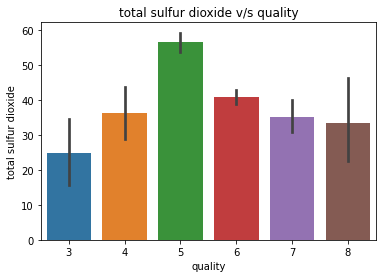

In [19]:
sns.barplot(y='total sulfur dioxide',x='quality',data=df)
plt.title('total sulfur dioxide v/s quality')

#### h). Visualize 'density' with respect to 'quality'

Text(0.5, 1.0, 'density v/s quality')

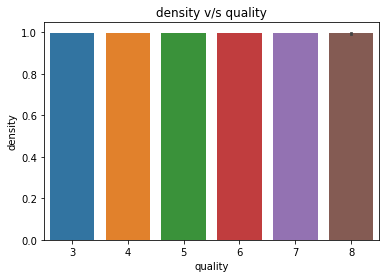

In [20]:
sns.barplot(y='density',x='quality',data=df)
plt.title('density v/s quality')

##### Outcome : Seem very less like neglable impact on 'quality'.

#### i). Visualize 'pH' with respect to 'quality'

Text(0.5, 1.0, 'pH v/s quality')

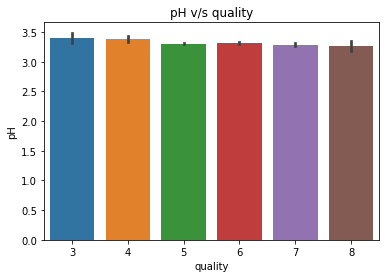

In [21]:
sns.barplot(y='pH',x='quality',data=df)
plt.title('pH v/s quality')

##### Outcome : Very less impact on 'quality'.

#### j). Visualize 'sulphates' with respect to 'quality'

Text(0.5, 1.0, 'sulphates v/s quality')

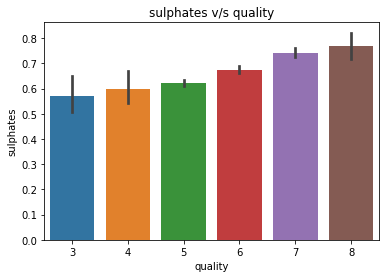

In [22]:
sns.barplot(y='sulphates',x='quality',data=df)
plt.title('sulphates v/s quality')

##### Outcome : Increasing the value will impact the 'quality'.

#### k). Visualize 'alcohol' with respect to 'quality'

Text(0.5, 1.0, 'alcohol v/s quality')

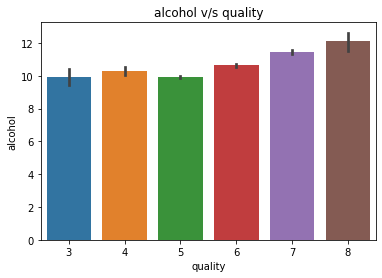

In [23]:
sns.barplot(y='alcohol',x='quality',data=df)
plt.title('alcohol v/s quality')

##### Outcome : Increase the value will impact the 'quality'.

### 6). Dealing with outlier's

In [24]:
from collections import Counter

In [25]:
def outlier_finding(df,features):
    outlier_indices = []
    
    for j in features:
        # 1st quartile
        Q1 = np.percentile(df[j],25)
        # 3st quartile
        Q3 = np.percentile(df[j],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_column = df[(df[j] < Q1 - outlier_step) | (df[j] > Q3 + outlier_step)].index
        # store indeces 
        outlier_indices.extend(outlier_list_column)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5) 
    
    return multiple_outliers

In [26]:
print("number of outliers detected --> ",len(df.loc[outlier_finding(df,df.columns[:-1])]))

number of outliers detected -->  120


In [27]:
df = df.drop(outlier_finding(df,df.columns[:-1]),axis = 0).reset_index(drop = True)

In [28]:
print('After dealing with outliers now the shape is :',df.shape)

After dealing with outliers now the shape is : (1479, 12)


In [29]:
print('Percentage Loss of data after removing outliers is :',((1599-1479)/1599)*100)

Percentage Loss of data after removing outliers is : 7.5046904315197


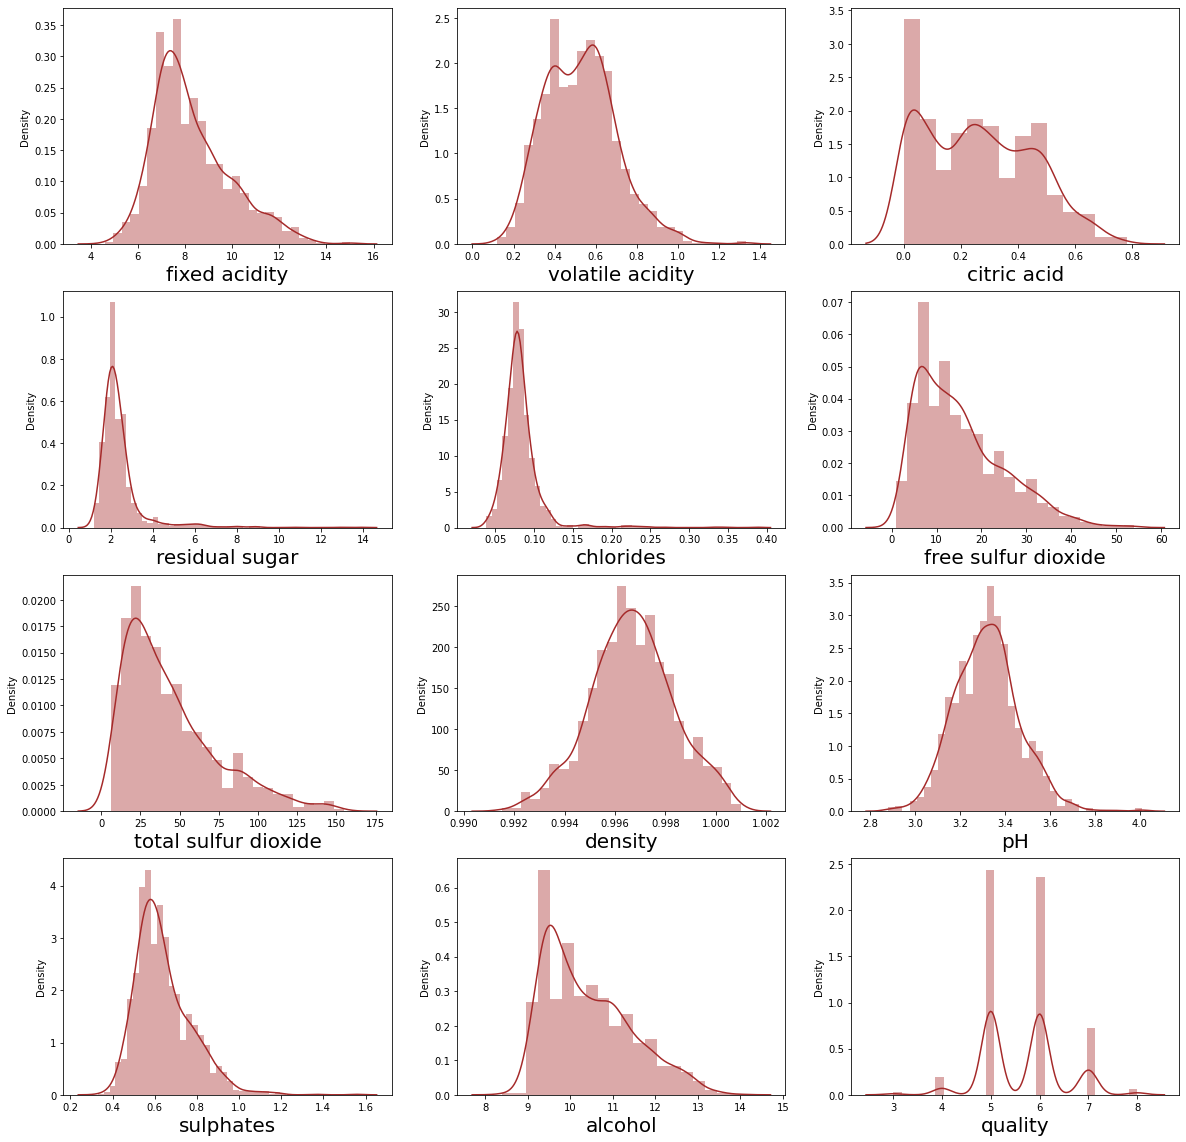

In [30]:
# Checking the distribution again

plt.figure(figsize=(20,20))
plot_number = 1
for col in df:
    if plot_number<=12:
        ax = plt.subplot(4,3,plot_number)   # plot is distributed in 4 row & 3 column
        sns.distplot(df[col],color='brown')           # plot displot for col which have all df column         
        plt.xlabel(col,fontsize = 20)
        
              
    plot_number+=1                           #increase plotnumber value by 1  
plt.show()

### 7. Dealing with target variable

In [31]:
df['quality'].value_counts()

5    622
6    602
7    184
4     48
8     15
3      8
Name: quality, dtype: int64

##### Observation : 
As per problem statement 'quality' below 7 is considered as 'not good/0' & greater than equal consider as  'good/1'.

##### Decision :
From value count as i can see i have 6 category of 'quality' so i need to convert into 2 category.

In [32]:
bins = (2, 6.5, 8)
labels = [0, 1]
df['quality'] = pd.cut(df['quality'], bins = bins, labels = labels)

In [33]:
df['quality'].value_counts()

0    1280
1     199
Name: quality, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1479 non-null   float64 
 1   volatile acidity      1479 non-null   float64 
 2   citric acid           1479 non-null   float64 
 3   residual sugar        1479 non-null   float64 
 4   chlorides             1479 non-null   float64 
 5   free sulfur dioxide   1479 non-null   float64 
 6   total sulfur dioxide  1479 non-null   float64 
 7   density               1479 non-null   float64 
 8   pH                    1479 non-null   float64 
 9   sulphates             1479 non-null   float64 
 10  alcohol               1479 non-null   float64 
 11  quality               1479 non-null   category
dtypes: category(1), float64(11)
memory usage: 128.8 KB


### 8. Selecting the independent variable as X and dependent variable as y

In [35]:
X = df.drop(columns='quality',axis=1)
y = df['quality']

In [36]:
print('The shape of X is :',X.shape)
print('The shape of y is :',y.shape)

The shape of X is : (1479, 11)
The shape of y is : (1479,)


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled

array([[-0.53908205,  0.99279983, -1.38762691, ...,  1.33187926,
        -0.61311187, -0.99771165],
       [-0.2929061 ,  2.02539544, -1.38762691, ..., -0.83609504,
         0.2896932 , -0.60496912],
       [-0.2929061 ,  1.33699837, -1.17567264, ..., -0.41648711,
         0.06399193, -0.60496912],
       ...,
       [-1.21606591, -0.0971622 , -0.69877554, ...,  0.70246737,
         0.81632948,  0.5732585 ],
       [-1.46224186,  0.67728451, -0.7517641 , ...,  1.75148719,
         0.51539446, -0.21222658],
       [-1.40069787, -1.24449065,  1.10283575, ...,  0.4926634 ,
         0.13922568,  0.5732585 ]])

### 9. Split the our data set into train & test split 

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=341)  

In [41]:
print('The shape of X-Training set is :',X_train.shape)
print('The shape of y-Training set is :',y_train.shape)
print('The shape of X-Test set is :',X_test.shape)
print('The shape of y-Test set is :',y_test.shape)

The shape of X-Training set is : (1183, 11)
The shape of y-Training set is : (1183,)
The shape of X-Test set is : (296, 11)
The shape of y-Test set is : (296,)


### 8. Initiate our model

In [42]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score  

#### a). Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lg =LogisticRegression()
lg.fit(X_train,y_train)
y_pred_lg = lg.predict(X_test)
cm_lg = confusion_matrix(y_test,y_pred_lg)
print('The score of Logistic Regression is on train set:',lg.score(X_train,y_train))
print('The score of Logistic Regression is on test set:',lg.score(X_test,y_test))
print('The accuracy score of Logistic Regression is:',accuracy_score(y_test,y_pred_lg))
print('\n The classification report of Logistic Regression is :\n',classification_report(y_test,y_pred_lg))
print('\n The Confusion matrix of Logistic Regression is\n',cm_lg)

The score of Logistic Regression is on train set: 0.8867286559594252
The score of Logistic Regression is on test set: 0.8817567567567568
The accuracy score of Logistic Regression is: 0.8817567567567568

 The classification report of Logistic Regression is :
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       258
           1       0.57      0.34      0.43        38

    accuracy                           0.88       296
   macro avg       0.74      0.65      0.68       296
weighted avg       0.86      0.88      0.87       296


 The Confusion matrix of Logistic Regression is
 [[248  10]
 [ 25  13]]


#### Cross Validation On Logistic Regression

In [45]:
score_lg = cross_val_score(lg,X_train,y_train,cv=5)
print('Cross Validation score of Logistic Regression is :',score_lg.mean())

Cross Validation score of Logistic Regression is : 0.8841664878781378


#### b). KNeighbors Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)
y_pred_kn = kn.predict(X_test)
cm_kn = confusion_matrix(y_test,y_pred_kn)
print('The score of KNeighbors Classifier is on train set:',kn.score(X_train,y_train))
print('The score of KNeighbors Classifier is on test set:',kn.score(X_test,y_test))
print('The accuracy score of KNeighbors Classifier is:',accuracy_score(y_test,y_pred_kn))
print('\n The classification report of KNeighbors Classifier is :\n',classification_report(y_test,y_pred_kn))
print('\n The Confusion matrix of KNeighbors Classifier is\n',cm_kn)

The score of KNeighbors Classifier is on train set: 0.9137785291631445
The score of KNeighbors Classifier is on test set: 0.8783783783783784
The accuracy score of KNeighbors Classifier is: 0.8783783783783784

 The classification report of KNeighbors Classifier is :
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       258
           1       0.55      0.32      0.40        38

    accuracy                           0.88       296
   macro avg       0.73      0.64      0.67       296
weighted avg       0.86      0.88      0.86       296


 The Confusion matrix of KNeighbors Classifier is
 [[248  10]
 [ 26  12]]


#### Cross Validation On KNeighbors Classifier

In [48]:
score_kn = cross_val_score(kn,X_train,y_train,cv=5)
print('Cross Validation score of KNeighbors Classifier is :',score_kn.mean())

Cross Validation score of KNeighbors Classifier is : 0.8706786812558105


#### c). Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test,y_pred_dt)
print('The score of Decision Tree Classifier is on train set:',dt.score(X_train,y_train))
print('The score of Decision Tree Classifier is on test set:',dt.score(X_test,y_test))
print('The accuracy score of Decision Tree Classifier is:',accuracy_score(y_test,y_pred_dt))
print('\n The classification report of Decision Tree Classifier is :\n',classification_report(y_test,y_pred_dt))
print('\n The Confusion matrix of Decision Tree Classifier is\n',cm_dt)

The score of Decision Tree Classifier is on train set: 1.0
The score of Decision Tree Classifier is on test set: 0.8817567567567568
The accuracy score of Decision Tree Classifier is: 0.8817567567567568

 The classification report of Decision Tree Classifier is :
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       258
           1       0.53      0.63      0.58        38

    accuracy                           0.88       296
   macro avg       0.74      0.78      0.75       296
weighted avg       0.89      0.88      0.89       296


 The Confusion matrix of Decision Tree Classifier is
 [[237  21]
 [ 14  24]]


#### Cross Validation On Decision Tree Classifier

In [51]:
score_dt = cross_val_score(dt,X_train,y_train,cv=5)
print('Cross Validation score of Decision Tree Classifier is :',score_dt.mean())

Cross Validation score of Decision Tree Classifier is : 0.8715332904240863


#### d). Random forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test,y_pred_rf)
print('The score of Random forest Classifier is on train set:',rf.score(X_train,y_train))
print('The score of Random forest Classifier is on test set:',rf.score(X_test,y_test))
print('The accuracy score of Random forest Classifier is:',accuracy_score(y_test,y_pred_rf))
print('\n The classification report of Random forest Classifier is :\n',classification_report(y_test,y_pred_rf))
print('\n The Confusion matrix of Random forest Classifier is\n',cm_rf)

The score of Random forest Classifier is on train set: 1.0
The score of Random forest Classifier is on test set: 0.918918918918919
The accuracy score of Random forest Classifier is: 0.918918918918919

 The classification report of Random forest Classifier is :
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       258
           1       0.75      0.55      0.64        38

    accuracy                           0.92       296
   macro avg       0.84      0.76      0.80       296
weighted avg       0.91      0.92      0.91       296


 The Confusion matrix of Random forest Classifier is
 [[251   7]
 [ 17  21]]


#### Cross Validation On Randomforest Clasifier

In [54]:
score_rf = cross_val_score(rf,X_train,y_train,cv=5)
print('Cross Validation score of Randomforest Clasifier is :',score_rf.mean())

Cross Validation score of Randomforest Clasifier is : 0.9112457984695702


#### e). Support Vector Classifier

In [55]:
from sklearn.svm import SVC

In [56]:
sm = SVC()
sm.fit(X_train,y_train)
y_pred_sm = sm.predict(X_test)
cm_sm = confusion_matrix(y_test,y_pred_sm)
print('The score of Support Vector Classifier is on train set:',sm.score(X_train,y_train))
print('The score of Support Vector Classifier is on test set:',sm.score(X_test,y_test))
print('The accuracy score of Support Vector Classifier is:',accuracy_score(y_test,y_pred_sm))
print('\n The classification report of Support Vector Classifier is :\n',classification_report(y_test,y_pred_sm))
print('\n The Confusion matrix of Support Vector Classifier is\n',cm_sm)

The score of Support Vector Classifier is on train set: 0.9036348267117498
The score of Support Vector Classifier is on test set: 0.8918918918918919
The accuracy score of Support Vector Classifier is: 0.8918918918918919

 The classification report of Support Vector Classifier is :
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       258
           1       0.71      0.26      0.38        38

    accuracy                           0.89       296
   macro avg       0.81      0.62      0.66       296
weighted avg       0.88      0.89      0.87       296


 The Confusion matrix of Support Vector Classifier is
 [[254   4]
 [ 28  10]]


#### Cross Validation On Support Vector Classifier

In [57]:
score_sm = cross_val_score(sm,X_train,y_train,cv=5)
print('Cross Validation score of Support Vector Classifier is :',score_sm.mean())

Cross Validation score of Support Vector Classifier is : 0.8875741972395051


#### f). Bagging Classifier

In [58]:
from sklearn.ensemble import BaggingClassifier

In [59]:
bc = BaggingClassifier()
bc.fit(X_train,y_train)
y_pred_bc = bc.predict(X_test)
cm_bc = confusion_matrix(y_test,y_pred_bc)
print('The score of Bagging Classifier is on train set:',bc.score(X_train,y_train))
print('The score of Bagging Classifier is on test set:',bc.score(X_test,y_test))
print('The accuracy Bagging Classifier is:',accuracy_score(y_test,y_pred_bc))
print('\n The classification report of Bagging Classifier is :\n',classification_report(y_test,y_pred_bc))
print('\n The Confusion matrix of Bagging Classifier is\n',cm_bc)

The score of Bagging Classifier is on train set: 0.9932375316990701
The score of Bagging Classifier is on test set: 0.9054054054054054
The accuracy Bagging Classifier is: 0.9054054054054054

 The classification report of Bagging Classifier is :
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       258
           1       0.67      0.53      0.59        38

    accuracy                           0.91       296
   macro avg       0.80      0.74      0.77       296
weighted avg       0.90      0.91      0.90       296


 The Confusion matrix of Bagging Classifier is
 [[248  10]
 [ 18  20]]


#### Cross Validation On Bagging Classifier

In [60]:
score_bc = cross_val_score(bc,X_train,y_train,cv=5)
print('Cross Validation score of Bagging Classifier is :',score_bc.mean())

Cross Validation score of Bagging Classifier is : 0.9070120861045556


#### g). Gradient Boosting Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gc = GradientBoostingClassifier()
gc.fit(X_train,y_train)
y_pred_gc = gc.predict(X_test)
cm_gc = confusion_matrix(y_test,y_pred_gc)
print('The score of Gradient Boosting Classifier is on train set:',bc.score(X_train,y_train))
print('The score of Gradient Boosting Classifier is on test set:',bc.score(X_test,y_test))
print('The accuracy Gradient Boosting Classifier is:',accuracy_score(y_test,y_pred_gc))
print('\n The classification report of Gradient Boosting Classifier is :\n',classification_report(y_test,y_pred_gc))
print('\n The Confusion matrix of Gradient Boosting Classifier is\n',cm_gc)

The score of Gradient Boosting Classifier is on train set: 0.9932375316990701
The score of Gradient Boosting Classifier is on test set: 0.9054054054054054
The accuracy Gradient Boosting Classifier is: 0.9155405405405406

 The classification report of Gradient Boosting Classifier is :
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       258
           1       0.76      0.50      0.60        38

    accuracy                           0.92       296
   macro avg       0.84      0.74      0.78       296
weighted avg       0.91      0.92      0.91       296


 The Confusion matrix of Gradient Boosting Classifier is
 [[252   6]
 [ 19  19]]


#### Cross Validation On Gradient Boosting Classifier

In [63]:
score_gc = cross_val_score(gc,X_train,y_train,cv=5)
print('Cross Validation score of Gradient Boosting Classifier is :',score_gc.mean())

Cross Validation score of Gradient Boosting Classifier is : 0.8951870128012587


#### h). AdaBoost Classifier

In [64]:
from sklearn.ensemble import AdaBoostClassifier

In [65]:
ac = AdaBoostClassifier()
ac.fit(X_train,y_train)
y_pred_ac = ac.predict(X_test)
cm_ac = confusion_matrix(y_test,y_pred_ac)
print('The score of AdaBoost Classifier is on train set:',ac.score(X_train,y_train))
print('The score of AdaBoost Classifier is on test set:',ac.score(X_test,y_test))
print('The accuracy AdaBoost Classifier is:',accuracy_score(y_test,y_pred_ac))
print('\n The classification report of AdaBoost Classifier is :\n',classification_report(y_test,y_pred_ac))
print('\n The Confusion matrix of AdaBoost Classifier is\n',cm_ac)

The score of AdaBoost Classifier is on train set: 0.9087066779374472
The score of AdaBoost Classifier is on test set: 0.8682432432432432
The accuracy AdaBoost Classifier is: 0.8682432432432432

 The classification report of AdaBoost Classifier is :
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       258
           1       0.48      0.42      0.45        38

    accuracy                           0.87       296
   macro avg       0.70      0.68      0.69       296
weighted avg       0.86      0.87      0.86       296


 The Confusion matrix of AdaBoost Classifier is
 [[241  17]
 [ 22  16]]


#### Cross Validation On AdaBoost Classifier

In [66]:
score_ac = cross_val_score(ac,X_train,y_train,cv=5)
print('Cross Validation score of AdaBoost Classifier is :',score_ac.mean())

Cross Validation score of AdaBoost Classifier is : 0.8884180790960452


#### i) XGB Boost Classifier

In [67]:
import xgboost as xb

In [68]:
xc = xb.XGBClassifier()
xc.fit(X_train,y_train)
y_pred_xc = xc.predict(X_test)
cm_xc = confusion_matrix(y_test,y_pred_xc)
print('The score of XGB Classifier is on train set:',xc.score(X_train,y_train))
print('The score of XGB Classifier is on test set:',xc.score(X_test,y_test))
print('The accuracy XGB Classifier is:',accuracy_score(y_test,y_pred_xc))
print('\n The classification report of XGB Classifier is :\n',classification_report(y_test,y_pred_xc))
print('\n The Confusion matrix of XGB Classifier is\n',cm_xc)

[16:27:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The score of XGB Classifier is on train set: 1.0
The score of XGB Classifier is on test set: 0.9121621621621622
The accuracy XGB Classifier is: 0.9121621621621622

 The classification report of XGB Classifier is :
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       258
           1       0.68      0.61      0.64        38

    accuracy                           0.91       296
   macro avg       0.81      0.78      0.79       296
weighted avg       0.91      0.91      0.91       296


 The Confusion matrix of XGB Classifier is
 [[247  11]
 [ 15  23]]


#### Cross Validation On XGB Classifier

In [69]:
score_xc = cross_val_score(xc,X_train,y_train,cv=5)
print('Cross Validation score of XGB Classifier is :',score_xc.mean())

[16:27:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:27:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:27:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:27:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### 9. Roc Curve

In [70]:
from sklearn.metrics import plot_roc_curve

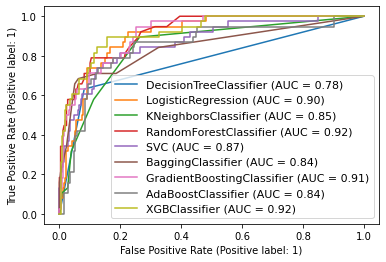

In [71]:
disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lg,X_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(sm,X_test,y_test,ax=disp.ax_)
plot_roc_curve(bc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(ac,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xc,X_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc = 'lower right')
plt.show()

##### Outcome : From the above curve i got Random Forest Classifier & XGB Classifier as best model for this data set.

### 10. Observing the accuracy & cross validation score of each model.

In [72]:
all_score = pd.DataFrame({})
all_score['Model Name'] = ['Logistic Regression','KNeighbors Classifier','Decision Tree Classifier','Random forest Classifier','Support Vector Classifier','Bagging Classifier','Gradient Boosting Classifier','AdaBoost Classifier','XGB Classifier']

In [73]:
all_score['Train Score'] = [lg.score(X_train,y_train),kn.score(X_train,y_train),dt.score(X_train,y_train),rf.score(X_train,y_train),sm.score(X_train,y_train),bc.score(X_train,y_train),gc.score(X_train,y_train),ac.score(X_train,y_train),xc.score(X_train,y_train)]

In [74]:
all_score['Test Score'] = [lg.score(X_test,y_test),kn.score(X_test,y_test),dt.score(X_test,y_test),rf.score(X_test,y_test),sm.score(X_test,y_test),bc.score(X_test,y_test),gc.score(X_test,y_test),ac.score(X_test,y_test),xc.score(X_test,y_test)]

In [75]:
all_score['Accuracy'] = [accuracy_score(y_test,y_pred_lg),accuracy_score(y_test,y_pred_kn),accuracy_score(y_test,y_pred_dt),accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_sm),accuracy_score(y_test,y_pred_bc),accuracy_score(y_test,y_pred_gc),accuracy_score(y_test,y_pred_ac),accuracy_score(y_test,y_pred_xc)]

In [76]:
all_score['Cross Validation Score'] = [score_lg.mean(),score_kn.mean(),score_dt.mean(),score_rf.mean(),score_sm.mean(),score_bc.mean(),score_gc.mean(),score_ac.mean(),score_xc.mean()]

In [77]:
all_score

,Model Name,Train Score,Test Score,Accuracy,Cross Validation Score
0,Logistic Regression,0.886729,0.881757,0.881757,0.884166
1,KNeighbors Classifier,0.913779,0.878378,0.878378,0.870679
2,Decision Tree Classifier,1.000000,0.881757,0.881757,0.871533
3,Random forest Classifier,1.000000,0.918919,0.918919,0.911246
4,Support Vector Classifier,0.903635,0.891892,0.891892,0.887574
5,Bagging Classifier,0.993238,0.905405,0.905405,0.907012
6,Gradient Boosting Classifier,0.964497,0.915541,0.915541,0.895187
7,AdaBoost Classifier,0.908707,0.868243,0.868243,0.888418
8,XGB Classifier,1.000000,0.912162,0.912162,0.910402


Text(0.5, 1.0, 'Train Score Analysis')

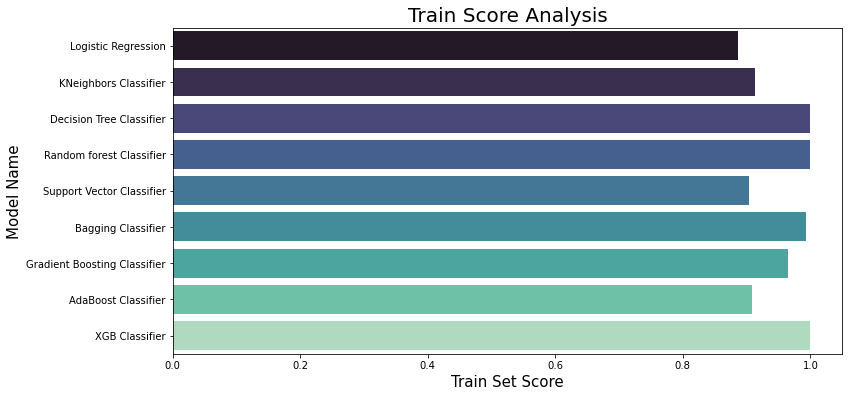

In [78]:
plt.figure(figsize=(12,6))
sns.barplot('Train Score','Model Name',data=all_score,palette = "mako")
plt.xlabel('Train Set Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Train Score Analysis',fontsize=20)

Text(0.5, 1.0, 'Test Score Analysis')

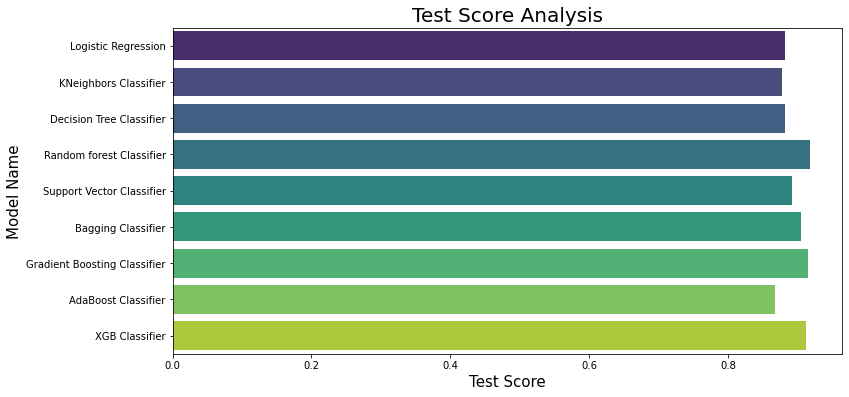

In [79]:
plt.figure(figsize=(12,6))
sns.barplot('Test Score','Model Name',data=all_score,palette = "viridis")
plt.xlabel('Test Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Test Score Analysis',fontsize=20)

Text(0.5, 1.0, 'Accuracy Score Analysis')

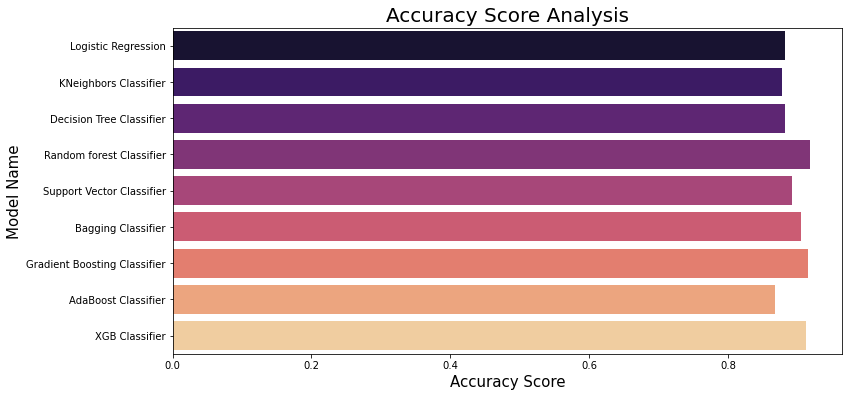

In [80]:
plt.figure(figsize=(12,6))
sns.barplot('Accuracy','Model Name',data=all_score,palette = "magma")
plt.xlabel('Accuracy Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Accuracy Score Analysis',fontsize=20)

Text(0.5, 1.0, 'Cross Validation Score Analysis')

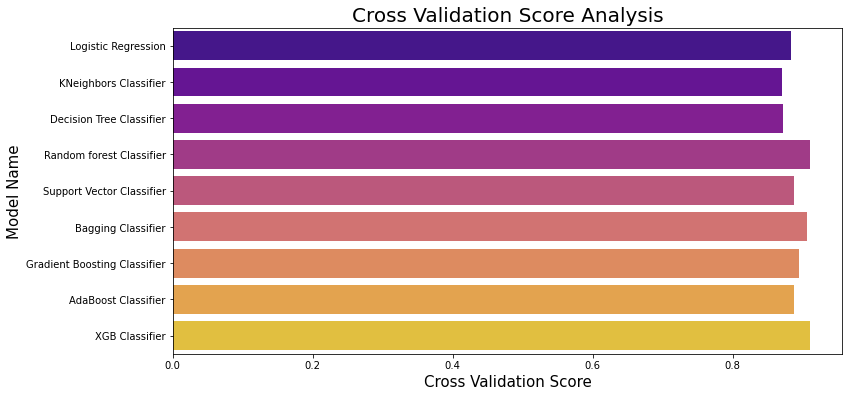

In [81]:
plt.figure(figsize=(12,6))
sns.barplot('Cross Validation Score','Model Name',data=all_score,palette = "plasma")
plt.xlabel('Cross Validation Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Cross Validation Score Analysis',fontsize=20)

### Conclusion :
##### For given data set as i observed Randomforest Classifier provide best score

### 11. Hyperparameter Tuning on Random Forest Classifier

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
clf = RandomForestClassifier()

param = {'n_estimators':[150,200],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
         'min_samples_leaf':[5,6],
         'min_samples_split':[10,11]
        }

grd = GridSearchCV(clf,param_grid=param)
grd.fit(X_train,y_train)
print("Best parameter",grd.best_params_)

clf = grd.best_estimator_

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

rf_con = confusion_matrix(y_test,y_pred_rf)

print("\n Confusion Matrix \n",rf_con)
print("Accuracy after hyper parameter tunning",accuracy_score(y_test,y_pred_rf))

Best parameter {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 150}

 Confusion Matrix 
 [[251   7]
 [ 17  21]]
Accuracy after hyper parameter tunning 0.918918918918919


In [86]:
clf = RandomForestClassifier()

param = {'n_estimators':[10,15,50,100,200],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
         'min_samples_leaf':[1,5,6],
         'min_samples_split':[2,10,11]
        }

grd = GridSearchCV(clf,param_grid=param)
grd.fit(X_train,y_train)
print("Best parameter",grd.best_params_)

clf = grd.best_estimator_

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

rf_con = confusion_matrix(y_test,y_pred_rf)

print("\n Confusion Matrix \n",rf_con)
print("Accuracy after hyper parameter tunning",accuracy_score(y_test,y_pred_rf))

Best parameter {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

 Confusion Matrix 
 [[251   7]
 [ 17  21]]
Accuracy after hyper parameter tunning 0.918918918918919


#### Conclusion : After hyperparameter tuning i am not able to increase the accuracy of model. So default parameter provide me the best accuracy.

### 12. Saving the model to a local file system

In [87]:
import pickle

In [88]:
final_result = 'Red Wine Quality.pickle'
pickle.dump(rf,open(final_result,'wb'))